# mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive

MyDrive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/recommendation_systems

/content/drive/MyDrive/Colab Notebooks/recommendation_systems


In [ ]:
# ! ls

In [ ]:
! pip install transformers

     |████████████████████████████████| 2.9 MB 5.1 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
     |████████████████████████████████| 636 kB 65.1 MB/s 
     |████████████████████████████████| 895 kB 58.5 MB/s 
     |████████████████████████████████| 3.3 MB 38.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# import modules

In [ ]:
import os
import re
from glob import glob
import zipfile
import pickle
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

import gc
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

# download data

https://msnews.github.io/

# load data

In [ ]:
data_path = "/content/drive/MyDrive/Colab Notebooks/recommendation_systems/mind_dataset/MINDlarge_train/"
# data_path = "/content/drive/MyDrive/Colab Notebooks/recommendation_systems/mind_dataset/MINDlarge_dev/"

In [ ]:
# The behaviors.tsv file contains the impression logs and users' news click histories. 
# It has 5 columns divided by the tab symbol:
# - Impression ID. The ID of an impression.
# - User ID. The anonymous ID of a user.
# - Time. The impression time with format "MM/DD/YYYY HH:MM:SS AM/PM".
# - History. The news click history (ID list of clicked news) of this user before this impression.
# - Impressions. List of news displayed in this impression and user's click behaviors on them (1 for click and 0 for non-click).
behaviors_path = os.path.join(data_path, 'behaviors.tsv')
df_behaviors = pd.read_table(
    behaviors_path,
    header=None,
    names=['impression_id', 'user_id', 'time', 'history', 'impressions'])
df_behaviors.head()

,impression_id,user_id,time,history,impressions
0,1,U87243,11/10/2019 11:30:54 AM,N8668 N39081 N65259 N79529 N73408 N43615 N29379 N32031 N110232 N101921 N12614 N129591 N105760 N60457 N1229 N64932,N78206-0 N26368-0 N7578-0 N58592-0 N19858-0 N58258-0 N18478-0 N2591-0 N97778-0 N32954-0 N94157-1 N39404-0 N108809-0 N78699-1 N71090-1 N40282-0 N31174-1 N37924-0 N27822-0
1,2,U598644,11/12/2019 1:45:29 PM,N56056 N8726 N70353 N67998 N83823 N111108 N107520 N53168 N78756 N106411 N81824 N85691 N16173 N24446 N120926 N19175 N126159 N26373 N72369 N73228 N111873 N88638 N29503 N31055,N47996-0 N82719-0 N117066-0 N8491-0 N123784-0 N21431-0 N106162-0 N59646-0 N118348-0 N25587-1 N37544-0 N20780-0 N36266-1 N46329-0 N64102-0 N120930-0 N62024-0 N11017-0 N76539-0 N26359-0 N108379-0 N87913-0 N125161-0 N23946-0 N83702-0 N62788-0 N6306-0 N66902-0 N93643-0
2,3,U532401,11/13/2019 11:23:03 AM,N128643 N87446 N122948 N9375 N82348 N129412 N54948 N36094 N44660 N3948 N21332 N81364 N83062 N87788 N59280 N31323,N103852-0 N53474-0 N127836-0 N47925-1
3,4,U593596,11/12/2019 12:24:09 PM,N31043 N39592 N4104 N8223 N114581 N92747 N12070 N61321 N40052 N50176 N101119 N76810 N37509,N38902-0 N76434-0 N71593-0 N100073-0 N108736-0 N3061-0 N89658-0 N33030-0 N110473-0 N125655-0 N100206-0 N37544-0 N60370-0 N59935-0 N114935-1 N114135-0 N46262-0 N61065-0 N46329-0 N27368-0 N84381-0 N83412-0 N2624-0 N34269-0 N19053-0 N115724-0 N20990-0 N100380-0 N2074-0 N128367-0 N8719-0 N109344-0 N33078-0 N100539-0 N119665-0 N7937-0 N121580-0 N108581-0 N92498-0 N18947-0 N109642-0 N79048-0 N47277-0 N53225-0 N41710-0 N122819-0 N30417-0 N79044-0 N76539-0 N57763-0 N54239-0 N62203-0
4,5,U239687,11/14/2019 8:03:01 PM,N65250 N122359 N71723 N53796 N41663 N41484 N112765 N100765 N87642 N83576 N33881 N110863 N67875 N100466 N36761 N116312 N82374 N93136 N10659 N4857 N32369 N21104 N96120 N50191 N77001 N59349 N66535 N19719 N127567 N96764 N54850 N61319 N113547 N13277 N36604 N32800 N116279 N73179 N124109 N16608 N98215 N6229 N17492 N64552 N91231 N63676 N67779 N82799 N9375 N26586 N48453 N10711 N101263 N21773 N115066 N70097 N18031 N15471 N454 N56610 N112933 N75756 N72571 N41544 N48112 N42209 N44759 N76970 N69300 N108284 N76557 N104961 N46069 N81745 N117275 N12252 N116750 N18171 N87002 N60556 N45946 N20573 N6718 N50901 N3290 N10869 N40259 N14986 N97548 N51302 N39307 N86320 N89086 N29786 N37094 N38627 N51450 N107878 N126611 N57342 N81982 N87654 N3435 N83253 N123097 N113417 N71728 N100119 N57900 N7391 N13604 N71728 N111704 N3565 N53215 N39384 N44431 N129207 N31418 N32534 N124532 N15922 N118298 N19577 N34004 N104234 N103357 N7992 N87859 N80126 N86141 N4289 N127530 N36450 N91985 N9273 N105191 N2927 N49485 N34520 N129412 N75078 N97753 N88892 N79285 N115007 N68429 N56365 N60132 N91985 N79724 N32641 N29709 N36823 N96616 N29709 N46994 N128125 N100655 N18914 N43911 N119601 N43312 N4012 N102366 N92079 N71665 N54177 N43104 N21264 N44671 N98656 N108393 N94450 N75220 N101271 N59645 N55120 N128115 N262 N117511 N70198 N88893 N9892 N9035 N102952 N117229 N65740 N72408 N117791 N80178 N477 N38485 N104029 N93006 N121168 N29466 N64862 N36573 N61712 N49594 N94499 N66959 N11266 N71922 N114335 N24344 N45083 N90679 N100033 N128429 N72135 N3113 N25166 N89408 N106403 N23264 N5967 N12820 N31820 N93575 N51431 N53933 N121845 N25163 N82045 N10996 N104737 N86842 N52677 N50720 N71857 N1118 N71977 N65749 N124752 N18515 N55558 N93359 N72976 N30755 N98095 N89631 N124966 N59447 N65044 N2664 N23666 N98051 N18548 N24446 N113698 N91597 N61321 N29936 N16202 N3188 N108312 N48258 N4266 N91979 N33197 N107039 N70664 N92747 N14032 N74723 N97466 N82926 N3242 N49418 N22773 N110586 N149 N76018 N39270 N34431 N59033 N26572 N78741 N10705 N13901 N89509 N5326 N94706 N77135 N46477 N5653 N114343 N64300 N48084 N91968 N13434 N73137 N1886 N90966 N18904 N1713 N40765 N120031 N21641 N67466 N35667 N10490 N112667 N108016 N41056 N67497 N120196 N50684 N11952 N41214 N31494 N64035 N70868 N73183 N81315 N78570 N88019 N54753 N75342 N73240 N11653 N116736 N127001 N18681 N97815 N51166 N41083 N9

In [ ]:
# The news.tsv file contains the detailed information of news articles involved in the behaviors.tsv file.
# It has 7 columns, which are divided by the tab symbol:
# - News ID
# - Category
# - Subcategory
# - Title
# - Abstract
# - URL
# - Title Entities (entities contained in the title of this news)
# - Abstract Entities (entities contained in the abstract of this news)
news_path = os.path.join(data_path, 'news.tsv')
df_news = pd.read_table(news_path,
              header=None,
              names=[
                  'id', 'category', 'subcategory', 'title', 'abstract', 'url',
                  'title_entities', 'abstract_entities'
              ])
df_news.head()

,id,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, and Prince Philip Swear By","Shop the notebooks, jackets, and more that the royals can't live without.",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"", ""Type"": ""P"", ""WikidataId"": ""Q80976"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [48], ""SurfaceForms"": [""Prince Philip""]}, {""Label"": ""Charles, Prince of Wales"", ""Type"": ""P"", ""WikidataId"": ""Q43274"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [28], ""SurfaceForms"": [""Prince Charles""]}, {""Label"": ""Elizabeth II"", ""Type"": ""P"", ""WikidataId"": ""Q9682"", ""Confidence"": 0.97, ""OccurrenceOffsets"": [11], ""SurfaceForms"": [""Queen Elizabeth""]}]",[]
1,N45436,news,newsscienceandtechnology,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on last year's models.,https://assets.msn.com/labs/mind/AABmf2I.html,"[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ""Q2796"", ""Confidence"": 0.999, ""OccurrenceOffsets"": [42], ""SurfaceForms"": [""iPads""]}, {""Label"": ""Walmart"", ""Type"": ""O"", ""WikidataId"": ""Q483551"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [0], ""SurfaceForms"": [""Walmart""]}]","[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ""Q2796"", ""Confidence"": 0.999, ""OccurrenceOffsets"": [12], ""SurfaceForms"": [""iPad""]}, {""Label"": ""Apple Inc."", ""Type"": ""O"", ""WikidataId"": ""Q312"", ""Confidence"": 0.999, ""OccurrenceOffsets"": [0], ""SurfaceForms"": [""Apple""]}]"
2,N23144,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding you back and keeping you from shedding that unwanted belly fat for good.,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""WikidataId"": ""Q193583"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [20], ""SurfaceForms"": [""Belly Fat""]}]","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""WikidataId"": ""Q193583"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [97], ""SurfaceForms"": [""belly fat""]}]"
3,N86255,health,medical,Dispose of unwanted prescription drugs during the DEA's Take Back Day,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ""Type"": ""O"", ""WikidataId"": ""Q622899"", ""Confidence"": 0.992, ""OccurrenceOffsets"": [50], ""SurfaceForms"": [""DEA""]}]",[]
4,N93187,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches of Ukraine's War,"Lt. Ivan Molchanets peeked over a parapet of sand bags at the front line of the war in Ukraine. Next to him was an empty helmet propped up to trick snipers, already perforated with multiple holes.",https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId"": ""Q212"", ""Confidence"": 0.946, ""OccurrenceOffsets"": [87], ""SurfaceForms"": [""Ukraine""]}]"


In [ ]:
# # The entity_embedding.vec file contains the 100-dimensional embeddings
# # of the entities learned from the subgraph by TransE method.
# # The first column is the ID of entity, and the other columns are the embedding vector values.
# entity_embedding_path = os.path.join(data_path, 'entity_embedding.vec')
# entity_embedding = pd.read_table(entity_embedding_path, header=None)
# entity_embedding['vector'] = entity_embedding.iloc[:, 1:101].values.tolist()
# entity_embedding = entity_embedding[[0,
#                                      'vector']].rename(columns={0: "entity"})
# entity_embedding.head(2)

In [ ]:
# # The relation_embedding.vec file contains the 100-dimensional embeddings
# # of the relations learned from the subgraph by TransE method.
# # The first column is the ID of relation, and the other columns are the embedding vector values.
# relation_embedding_path = os.path.join(data_path, 'relation_embedding.vec')
# relation_embedding = pd.read_table(relation_embedding_path, header=None)
# relation_embedding['vector'] = relation_embedding.iloc[:,
#                                                        1:101].values.tolist()
# relation_embedding = relation_embedding[[0, 'vector'
#                                          ]].rename(columns={0: "relation"})
# relation_embedding.head(2)

In [ ]:
df_behaviors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232748 entries, 0 to 2232747
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   impression_id  int64 
 1   user_id        object
 2   time           object
 3   history        object
 4   impressions    object
dtypes: int64(1), object(4)
memory usage: 85.2+ MB


In [ ]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101527 entries, 0 to 101526
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 101527 non-null  object
 1   category           101527 non-null  object
 2   subcategory        101527 non-null  object
 3   title              101527 non-null  object
 4   abstract           96112 non-null   object
 5   url                101527 non-null  object
 6   title_entities     101524 non-null  object
 7   abstract_entities  101521 non-null  object
dtypes: object(8)
memory usage: 6.2+ MB


In [ ]:
df_news[df_news["id"]=="N32231"]

,id,category,subcategory,title,abstract,url,title_entities,abstract_entities
101177,N32231,sports,football_nfl,"Football: Kennedy with miracle finish, wins CHSFL championship 39-33 in OT over Spellman",Clayton Proctor ran for four TDs and threw for another as Kennedy came from behind to win the Catholic schools Class A football title in OT over Spellman.,https://assets.msn.com/labs/mind/BBWyseg.html,"[{""Label"": ""Association football"", ""Type"": ""C"", ""WikidataId"": ""Q2736"", ""Confidence"": 0.975, ""OccurrenceOffsets"": [0], ""SurfaceForms"": [""Football""]}]","[{""Label"": ""Touchdown"", ""Type"": ""C"", ""WikidataId"": ""Q650807"", ""Confidence"": 0.997, ""OccurrenceOffsets"": [29], ""SurfaceForms"": [""TDs""]}, {""Label"": ""Catholic Church"", ""Type"": ""O"", ""WikidataId"": ""Q9592"", ""Confidence"": 0.989, ""OccurrenceOffsets"": [94], ""SurfaceForms"": [""Catholic""]}, {""Label"": ""Minor League Baseball"", ""Type"": ""O"", ""WikidataId"": ""Q84129"", ""Confidence"": 0.948, ""OccurrenceOffsets"": [111], ""SurfaceForms"": [""Class A""]}]"


# process data

In [ ]:
num_users = 100

In [ ]:
df_bev_select = df_behaviors.tail(num_users)[["history","impressions"]]
df_bev_select.head(2)

,history,impressions
2232648,N82897 N82773 N39472 N71960 N118998 N122948 N35891 N42280 N39472 N35797 N111782 N77001 N39049 N98062 N120437 N69362 N44090 N113776 N42825 N104879 N68004 N17292 N75236 N20062 N91170 N60192 N83297 N76171 N66226 N52209 N42430 N127337 N30161 N43205 N46496 N93363 N93482 N93482 N20719 N25996 N943 N37494 N54171 N48257 N50489 N106288 N41143 N7671 N35229 N90425 N17258 N110836 N948 N50091 N102283 N119800 N117948 N11378 N69769 N61262 N86320 N127044 N369 N8650 N21572 N60001 N64629 N37499 N61868 N34697 N46397 N60832 N89484 N2002 N36094 N2314 N122167 N63818 N29707 N50012 N71529 N103745 N108752 N126158 N52885 N68440 N111245 N99171 N129419 N47142 N129624 N77216 N120607 N48177 N47896 N78157 N76043 N105081 N59332 N71699 N85691 N120646 N89916 N57235 N41476 N128011 N49311 N51757 N81976 N105203 N2942 N67429 N128444 N42492 N8995 N69800 N95088 N50361 N27861 N100190,N51140-0 N10242-0 N12917-0 N32844-0 N128788-0 N68752-1 N15330-0 N8935-0 N2624-0 N101258-0 N37930-0 N26404-0 N31855-0 N4858-0 N119275-0 N59654-0 N50986-0 N82638-0 N56850-0 N125006-0 N54671-0 N115427-0
2232649,N101263 N8223 N74042 N118268 N3681 N116035 N108769,N51757-0 N56196-0 N117183-0 N127679-1 N79716-0 N119468-0 N69772-0


In [ ]:
df_impressions = df_bev_select[["impressions","history"]]
df_click_raw = df_impressions.assign(impressions=df_impressions.impressions.str.split(" ")).explode('impressions')
df_click_raw = df_click_raw.assign(history=df_click_raw.history.str.split(" ")).explode('history')
df_click_raw[['id','click_flag']] = df_click_raw.impressions.str.split("-", expand=True)
df_click_raw["click_flag"] = df_click_raw["click_flag"].astype(int)
df_click = df_click_raw.groupby(["id","history"]).mean().reset_index()
display(df_click.head())
df_click.info()

,id,history,click_flag
0,N100073,N101578,0.0
1,N100073,N103116,1.0
2,N100073,N104737,0.0
3,N100073,N104760,0.0
4,N100073,N106961,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128026 entries, 0 to 128025
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          128026 non-null  object 
 1   history     128026 non-null  object 
 2   click_flag  128026 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.9+ MB


In [ ]:
df_click["click_flag"].value_counts()

0.000000    123466
1.000000      4342
0.500000       191
0.333333        19
0.666667         5
0.250000         3
Name: click_flag, dtype: int64

In [ ]:
df_news_select = df_news[["id","category","title"]]
df_raw = pd.merge(df_click, df_news_select, how="left", on="id")
df_raw.rename(columns={"title":"impression_title", "category":"impression_category"}, inplace=True)
df_raw = pd.merge(df_raw, df_news_select, how="left", left_on="history", right_on="id")
df_raw.rename(columns={"title":"history_title", "category":"history_category", "id_x":"impression"}, inplace=True)
df_raw.drop(columns="id_y", inplace=True)
print(df_raw.count())
df_raw.head()

impression             128026
history                128026
click_flag             128026
impression_category    128026
impression_title       128026
history_category       128026
history_title          128026
dtype: int64


,impression,history,click_flag,impression_category,impression_title,history_category,history_title
0,N100073,N101578,0.0,lifestyle,Why Prince Harry Wore His Remembrance Poppy Differently from the Rest of the Royal Family,finance,Apple is laying the groundwork for an iPhone subscription
1,N100073,N103116,1.0,lifestyle,Why Prince Harry Wore His Remembrance Poppy Differently from the Rest of the Royal Family,music,The 50 Best One-Hit Wonders of All Time
2,N100073,N104737,0.0,lifestyle,Why Prince Harry Wore His Remembrance Poppy Differently from the Rest of the Royal Family,movies,Kevin Spacey Won't Be Charged in Sexual Assault Case After Accuser Dies
3,N100073,N104760,0.0,lifestyle,Why Prince Harry Wore His Remembrance Poppy Differently from the Rest of the Royal Family,news,Trump's 'bombshell' offer to family of British teen killed in car crash: Diplomat's wife is in next room
4,N100073,N106961,1.0,lifestyle,Why Prince Harry Wore His Remembrance Poppy Differently from the Rest of the Royal Family,autos,32 Most Reliable Trucks of All Time


In [ ]:
# save to csv file
filename = data_path + "nlp_impression_history_train_example.csv"
df_raw.to_csv(filename)

# process text

In [ ]:
df_text = df_raw.copy()
del df_raw
gc.collect()

112

In [ ]:
import string

def remove_punctuation(text):
    # remove links,remove punctuation and remove words containing numbers.
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df_text['history_title'] = df_text['history_title'].apply(str).apply(lambda x: remove_punctuation(x))
df_text['impression_title'] = df_text['impression_title'].apply(str).apply(lambda x: remove_punctuation(x))
df_text.head()

,impression,history,click_flag,impression_category,impression_title,history_category,history_title
0,N100073,N101578,0.0,lifestyle,Why Prince Harry Wore His Remembrance Poppy Differently from the Rest of the Royal Family,finance,Apple is laying the groundwork for an iPhone subscription
1,N100073,N103116,1.0,lifestyle,Why Prince Harry Wore His Remembrance Poppy Differently from the Rest of the Royal Family,music,The Best OneHit Wonders of All Time
2,N100073,N104737,0.0,lifestyle,Why Prince Harry Wore His Remembrance Poppy Differently from the Rest of the Royal Family,movies,Kevin Spacey Wont Be Charged in Sexual Assault Case After Accuser Dies
3,N100073,N104760,0.0,lifestyle,Why Prince Harry Wore His Remembrance Poppy Differently from the Rest of the Royal Family,news,Trumps bombshell offer to family of British teen killed in car crash Diplomats wife is in next room
4,N100073,N106961,1.0,lifestyle,Why Prince Harry Wore His Remembrance Poppy Differently from the Rest of the Royal Family,autos,Most Reliable Trucks of All Time


# NER

## examples

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('treebank')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [ ]:
sentence = "Apple employees eat apple and Apple at Apple"
token = nltk.word_tokenize(sentence)
token_tag = nltk.pos_tag(token)
index = 1
for chunk in nltk.ne_chunk(token_tag):
    if hasattr(chunk, 'label'):
        print(index, chunk)
    index += 1

1 (GPE Apple/NNP)
6 (PERSON Apple/NNP)
8 (ORGANIZATION Apple/NNP)


In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")
nlp = pipeline("ner", model=model, tokenizer=tokenizer)

ner_results = nlp(sentence)
for i in range(len(ner_results)):
    print(ner_results[i])

{'entity': 'B-ORG', 'score': 0.99894875, 'index': 1, 'word': 'Apple', 'start': 0, 'end': 5}
{'entity': 'B-ORG', 'score': 0.9976597, 'index': 6, 'word': 'Apple', 'start': 30, 'end': 35}
{'entity': 'B-ORG', 'score': 0.99550945, 'index': 8, 'word': 'Apple', 'start': 39, 'end': 44}


In [ ]:
import nltk

sentence = "Apple employees eat apple and Apple at Apple"
token = nltk.word_tokenize(sentence)
token_tag = nltk.pos_tag(token)
entities_flag_list = []
chunk_list = []
index = 1
for chunk in nltk.ne_chunk(token_tag):
    print(index, chunk)
    if hasattr(chunk, 'label'):
        entities_flag = 1
        chunk_flag = chunk[0][0]
    else:
        entities_flag = 0
        chunk_flag = chunk[0]
    chunk_list.append(chunk_flag)
    entities_flag_list.append(entities_flag)
    index += 1

1 (GPE Apple/NNP)
2 ('employees', 'NNS')
3 ('eat', 'VBP')
4 ('apple', 'NN')
5 ('and', 'CC')
6 (PERSON Apple/NNP)
7 ('at', 'IN')
8 (ORGANIZATION Apple/NNP)


## process entities

In [ ]:
print(df_text["impression"].count())
num_text = 10000
df_text_select = df_text.tail(num_text)
print(df_text_select.count())
df_text_select.head()#(200)

128026
impression             10000
history                10000
click_flag             10000
impression_category    10000
impression_title       10000
history_category       10000
history_title          10000
dtype: int64


,impression,history,click_flag,impression_category,impression_title,history_category,history_title
118026,N90822,N119731,1.0,autos,Inside Pirellis Massive Formula One Tire Operation,autos,The opentop Lamborghini Gallardo concept of your dreams is for sale
118027,N90822,N119788,1.0,autos,Inside Pirellis Massive Formula One Tire Operation,sports,Jets GM defends CEOs hopefully the team will actually show up crack to fans
118028,N90822,N120773,1.0,autos,Inside Pirellis Massive Formula One Tire Operation,tv,Lori Harvey arrested for hit and run in Beverly Hills
118029,N90822,N121168,1.0,autos,Inside Pirellis Massive Formula One Tire Operation,lifestyle,Dog Randomly Drops By Family Reunion Then People Check His Collar
118030,N90822,N121394,1.0,autos,Inside Pirellis Massive Formula One Tire Operation,sports,Blind USC long snapper Jake Olson has hilarious response to Lane Kiffins tweet


In [ ]:
df_text_select[df_text_select["history"]=="N100851"].head()

,impression,history,click_flag,impression_category,impression_title,history_category,history_title


In [ ]:
df_text_select[df_text_select["click_flag"]==1.0].head()

,impression,history,click_flag,impression_category,impression_title,history_category,history_title
118026,N90822,N119731,1.0,autos,Inside Pirellis Massive Formula One Tire Operation,autos,The opentop Lamborghini Gallardo concept of your dreams is for sale
118027,N90822,N119788,1.0,autos,Inside Pirellis Massive Formula One Tire Operation,sports,Jets GM defends CEOs hopefully the team will actually show up crack to fans
118028,N90822,N120773,1.0,autos,Inside Pirellis Massive Formula One Tire Operation,tv,Lori Harvey arrested for hit and run in Beverly Hills
118029,N90822,N121168,1.0,autos,Inside Pirellis Massive Formula One Tire Operation,lifestyle,Dog Randomly Drops By Family Reunion Then People Check His Collar
118030,N90822,N121394,1.0,autos,Inside Pirellis Massive Formula One Tire Operation,sports,Blind USC long snapper Jake Olson has hilarious response to Lane Kiffins tweet


In [ ]:
# def identify_entities_and_label_words(df_texts, id="impression", title="impression_title"):
#     category = id + "_category"
#     df_texts = df_texts[[id, title, category, "click_flag"]].groupby([id, title, category]).mean().reset_index()
#     df_list = []
#     for lines, sentence in enumerate(df_texts[title]):
#         # tokenize words and get entities
#         token = nltk.word_tokenize(sentence)
#         token_tag = nltk.pos_tag(token)
#         print(token_tag)
#         entities_flag_list = []
#         chunk_list = []
#         for chunk in nltk.ne_chunk(token_tag):
#             if hasattr(chunk, 'label'):
#                 entities_flag = 1
#                 chunk_flag_list = []
#                 for i in range(len(chunk)):
#                     chunk_flag_list.append(chunk[i][0])
#                 chunk_flag = ' '.join(chunk_flag_list)
#             else:
#                 entities_flag = 0
#                 chunk_flag = chunk[0]
#             chunk_list.append(chunk_flag)
#             entities_flag_list.append(entities_flag)
#         print(chunk_list)
#         # get labels
#         labels = []
#         word_list = sentence.split(" ")
#         for item in word_list:
#             labels.append(df_texts[id][lines])

#         # combine data to df
#         df_tag = pd.DataFrame(token_tag, columns=["words", "pos_tag"]).reset_index()
#         df_labels = pd.DataFrame(labels, columns=[id]).reset_index()
#         # df_labels = pd.DataFrame(zip(word_list, labels), columns=["words2", id]).reset_index()
#         df_entities = pd.DataFrame(zip(chunk_list, entities_flag_list), columns=["chunk_list", "entities_flag"]).reset_index()
        
#         df_tag.set_index("index", inplace=True)
#         df_labels.set_index("index", inplace=True)
#         df_combine = df_tag.join(df_labels, how='left')
#         df_entities.set_index("index", inplace=True)
#         df_combine = pd.merge(df_combine, df_entities, how='left', left_on="words", right_on="chunk_list")
#         df_combine.drop(columns="chunk_list", inplace=True)
#         df_list.append( df_combine )
#     df_select_words = pd.concat(df_list, ignore_index=True)
#     # select only entities
#     df_select_words = df_select_words[df_select_words["entities_flag"]==1.0]

#     return df_select_words

In [ ]:
def identify_entities_and_label_words(df_texts, id="impression", title="impression_title"):
    category = id + "_category"
    df_texts = df_texts[[id, title, category, "click_flag"]].groupby([id, title, category]).mean().reset_index()
    df_list = []
    for lines, sentence in enumerate(df_texts[title]):
        # tokenize words and get entities
        token = nltk.word_tokenize(sentence)
        token_tag = nltk.pos_tag(token)
        entities_flag_list = []
        chunk_list = []
        for chunk in nltk.ne_chunk(token_tag):
            if hasattr(chunk, 'label'):
                entities_flag = 1
                chunk_flag_list = []
                for i in range(len(chunk)):
                    chunk_flag_list.append(chunk[i][0])
                chunk_flag = ' '.join(chunk_flag_list)
            else:
                entities_flag = 0
                chunk_flag = chunk[0]
            chunk_list.append(chunk_flag)
            entities_flag_list.append(entities_flag)

        # get labels ID
        labels = []
        for item in chunk_list:
            labels.append(df_texts[id][lines])

        # combine data to df
        df_labels = pd.DataFrame(labels, columns=[id]).reset_index()
        df_entities = pd.DataFrame(zip(chunk_list, entities_flag_list), columns=["chunk_list", "entities_flag"]).reset_index()
        
        df_labels.set_index("index", inplace=True)
        df_entities.set_index("index", inplace=True)
        df_combine = df_labels.join(df_entities, how='left')
        df_list.append( df_combine )
    df_select_words = pd.concat(df_list, ignore_index=True)
    # select only entities
    df_select_words = df_select_words[df_select_words["entities_flag"]==1.0]

    return df_select_words

In [ ]:
%%time
print("text length", len(df_text_select))
df_impression = identify_entities_and_label_words(df_text_select, "impression", "impression_title")
display(df_impression.head())
df_history = identify_entities_and_label_words(df_text_select, "history", "history_title")
display(df_history.head())
df_entitiies = df_text_select[["impression","history","click_flag"]]
df_entitiies = pd.merge(df_entitiies, df_impression, on="impression")
df_entitiies = pd.merge(df_entitiies, df_history, on="history")
display(df_entitiies.head(10))

text length 10000


,impression,chunk_list,entities_flag
1,N90822,Pirellis Massive Formula One Tire,1
3,N90853,Maggert,1
8,N90853,Champions,1
10,N90853,McCarron,1
12,N90853,Schwab Cup,1


,history,chunk_list,entities_flag
3,N100033,ISIS,1
13,N100033,Iraq,1
14,N100201,Mom,1
19,N100201,Daughter Dies Being,1
22,N100201,Amusement Park Ride,1


,impression,history,click_flag,chunk_list_x,entities_flag_x,chunk_list_y,entities_flag_y
0,N90822,N119788,1.0,Pirellis Massive Formula One Tire,1,GM,1
1,N90822,N119788,1.0,Pirellis Massive Formula One Tire,1,CEOs,1
2,N91436,N119788,0.0,Wild Over Steamboat Willie,1,GM,1
3,N91436,N119788,0.0,Wild Over Steamboat Willie,1,CEOs,1
4,N93411,N119788,0.0,Ilhan,1,GM,1
5,N93411,N119788,0.0,Ilhan,1,CEOs,1
6,N93411,N119788,0.0,Omar,1,GM,1
7,N93411,N119788,0.0,Omar,1,CEOs,1
8,N93411,N119788,0.0,Pete King,1,GM,1
9,N93411,N119788,0.0,Pete King,1,CEOs,1


CPU times: user 16.3 s, sys: 214 ms, total: 16.5 s
Wall time: 16.4 s


In [ ]:
df_entitiies["click_flag"].value_counts()

0.000000    34957
1.000000     2538
0.500000      136
0.333333       22
0.250000       12
0.666667        9
Name: click_flag, dtype: int64

# Knowledge graph

In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

In [ ]:
df_text.head()

,impression,history,click_flag,impression_category,impression_title,history_category,history_title
0,N100073,N101578,0.0,lifestyle,Why Prince Harry Wore His Remembrance Poppy Differently from the Rest of the Royal Family,finance,Apple is laying the groundwork for an iPhone subscription
1,N100073,N103116,1.0,lifestyle,Why Prince Harry Wore His Remembrance Poppy Differently from the Rest of the Royal Family,music,The Best OneHit Wonders of All Time
2,N100073,N104737,0.0,lifestyle,Why Prince Harry Wore His Remembrance Poppy Differently from the Rest of the Royal Family,movies,Kevin Spacey Wont Be Charged in Sexual Assault Case After Accuser Dies
3,N100073,N104760,0.0,lifestyle,Why Prince Harry Wore His Remembrance Poppy Differently from the Rest of the Royal Family,news,Trumps bombshell offer to family of British teen killed in car crash Diplomats wife is in next room
4,N100073,N106961,1.0,lifestyle,Why Prince Harry Wore His Remembrance Poppy Differently from the Rest of the Royal Family,autos,Most Reliable Trucks of All Time


In [ ]:
kg_df = df_text.copy()
kg_df["source"] = kg_df["history_category"]
kg_df["target"] = kg_df["impression_category"]
kg_df["edge"] = kg_df["click_flag"]
kg_df["edge"].value_counts()

0.000000    123466
1.000000      4342
0.500000       191
0.333333        19
0.666667         5
0.250000         3
Name: edge, dtype: int64

In [ ]:
def create_direct_graph(kg_df):
    edge_list = [1.0, 0.0]
    title_list = ["click", "non-click"]
    fig = plt.figure(figsize=(20,10))
    for i in range(2):
        ax = plt.subplot(1,2,i+1)
        df_plot = kg_df[kg_df['edge']==edge_list[i]].head(10000)
        G=nx.from_pandas_edgelist(df_plot, "source", "target", 
                                  edge_attr=True, create_using=nx.MultiDiGraph())

        pos = nx.spring_layout(G)
        nx.draw(G, with_labels=True, node_color='skyblue', 
                edge_cmap=plt.cm.Blues, pos = pos, arrowsize=10,
                node_size=3000)
        title = title_list[i]
        plt.title(title, fontsize=16)
    plt.suptitle("Category relationship for click and non-click cases", fontsize=20)
    plt.show()
    return

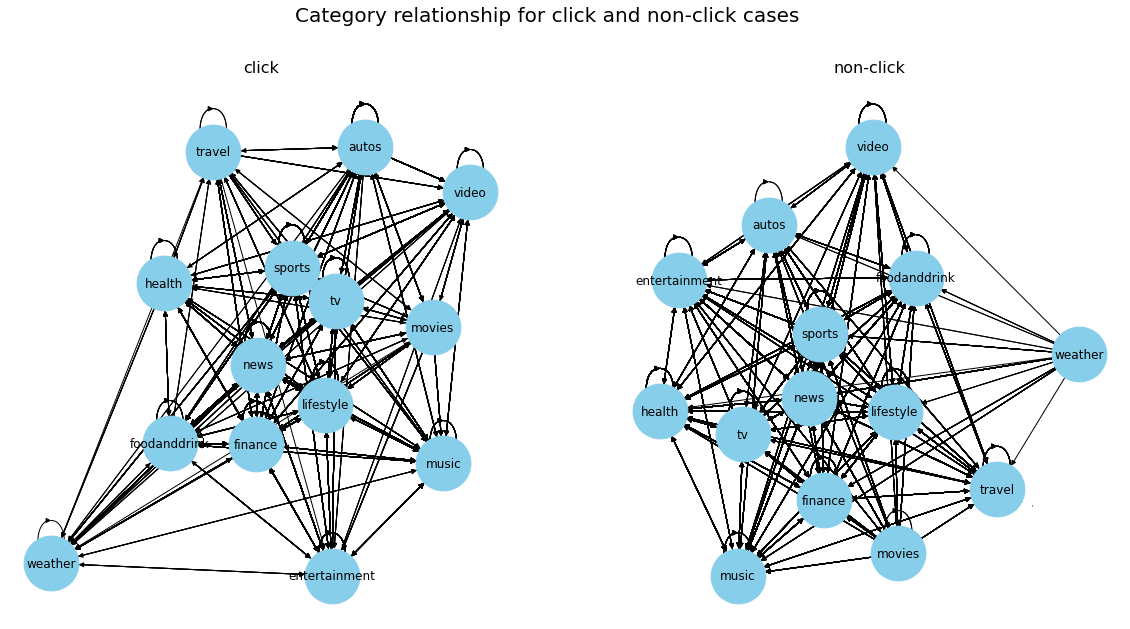

In [ ]:
create_direct_graph(kg_df)

In [ ]:
df_entitiies.head()

,impression,history,click_flag,chunk_list_x,entities_flag_x,chunk_list_y,entities_flag_y
0,N90822,N119788,1.0,Pirellis Massive Formula One Tire,1,GM,1
1,N90822,N119788,1.0,Pirellis Massive Formula One Tire,1,CEOs,1
2,N91436,N119788,0.0,Wild Over Steamboat Willie,1,GM,1
3,N91436,N119788,0.0,Wild Over Steamboat Willie,1,CEOs,1
4,N93411,N119788,0.0,Ilhan,1,GM,1


In [ ]:
kg_df2 = df_entitiies.copy()
kg_df2["source"] = kg_df2["chunk_list_y"]
kg_df2["target"] = kg_df2["chunk_list_x"]
kg_df2["edge"] = kg_df2["click_flag"]
kg_df2["edge"].value_counts()

0.000000    34957
1.000000     2538
0.500000      136
0.333333       22
0.250000       12
0.666667        9
Name: edge, dtype: int64

In [ ]:
def create_direct_graph_select_word(kg_df, word=""):
    kg_df = kg_df[(kg_df["source"]==word) | (kg_df["target"]==word)]
    edge_list = [1.0, 0.0]
    title_list = ["click", "non-click"]
    fig = plt.figure(figsize=(20,10))
    for i in range(2):
        ax = plt.subplot(1,2,i+1)
        df_plot = kg_df[kg_df['edge']==edge_list[i]].head(20)
        G=nx.from_pandas_edgelist(df_plot, "source", "target", 
                                  edge_attr=True, create_using=nx.MultiDiGraph())

        pos = nx.spring_layout(G)
        nx.draw(G, with_labels=True, node_color='skyblue', 
                edge_cmap=plt.cm.Blues, pos = pos, arrowsize=10,
                node_size=3000)
        title = title_list[i]
        plt.title(title, fontsize=16)
    main_title = "Entities relationship for click and non-click cases: {}".format(word)
    plt.suptitle(main_title, fontsize=20)
    plt.show()
    return

In [ ]:
kg_df2[kg_df2["click_flag"]==1.0]["chunk_list_x"].value_counts().head(20)

Sarah Palin                          358
Pirellis Massive Formula One Tire    318
Hated Eating Years Ago               251
Popular                              251
Michigan                             143
Charles                              143
Detroit Lions                        143
Buffalo                              102
Wild Wings                           102
Baby                                  88
Alabama                               88
Trump                                 88
Florida                               50
Peter Luger                           41
New York Times                        41
Sears                                 31
Selena                                29
Julia Michaels                        29
Gomez                                 29
Russell                               23
Name: chunk_list_x, dtype: int64

In [ ]:
kg_df2[kg_df2["click_flag"]==0.0]["chunk_list_x"].value_counts().head(10)

Charles               1015
Remembrance            997
Michigan               994
Detroit Lions          994
Royal Family           847
Best Photos            847
Trump                  796
FAA                    680
Southwest Airlines     680
Pete King              596
Name: chunk_list_x, dtype: int64

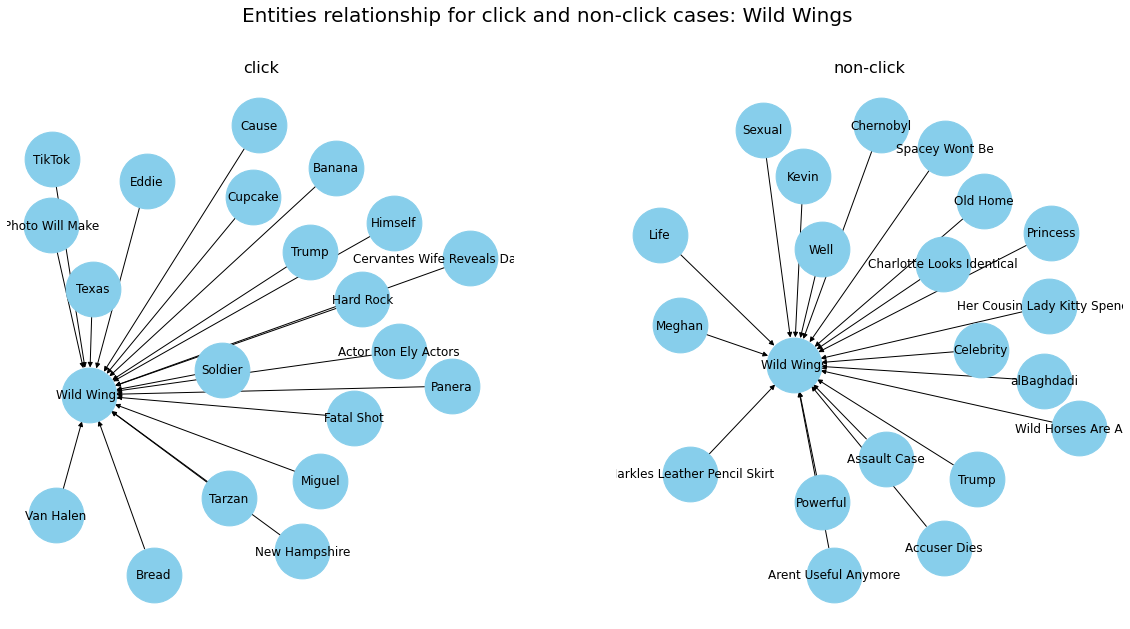

In [ ]:
create_direct_graph_select_word(kg_df2, "Wild Wings")

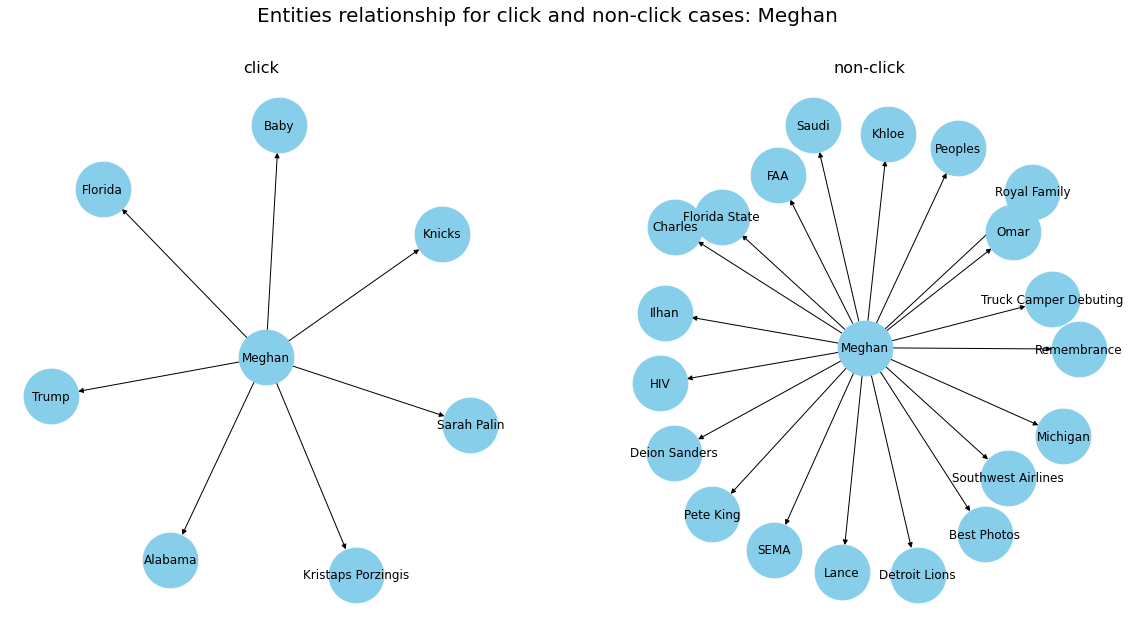

In [ ]:
create_direct_graph_select_word(kg_df2, "Meghan")

# unmount and flush google drive

In [ ]:
# from google.colab import drive
# drive.flush_and_unmount()